## Final Project Submission

Please fill out:
* Student name: 
1. **Anne Mumbe**
  
2. **Davis Chirchir**


4. **Elvis Oduor**

5. **Esterina Kananu**

6. **Kelvin Omina**
* Student pace: Part time
* Scheduled project review date/time: 09/06/2025
* Instructor name: Samuel G. Mwangi
* Blog post URL:


  <h2 align="center"> Effect of Production Budget, Genre,Market and Release Timing on The Revenue Growth of Box Office Movie Business</h2>
  
## Overview / Strategic Intent
In an entertainment industry dominated by a few risk-averse studios, there's a glaring opportunity for disruption. This strategy equips a new studio with the precision of data science, the agility of startups, and the creative freedom of independents  to outperform legacy players without outspending them.

As streaming platforms reshape the entertainment landscape, our company seeks to enter the movie industry by establishing its own production studio. To compete effectively, we must understand the factors that drive box office success. This project focuses on evaluating how genre type, production budget,markets and release timing influence the commercial performance of films.

Using data from TMDb, Box Office Mojo, and other public movie datasets, the analysis aims to uncover patterns that correlate with higher profitability and revenue growth. The findings will guide strategic decisions on what kinds of films to produce and when to release them, offering data-driven recommendations for building a successful movie business.
  ## Business Understanding

Our company plans to start a new movie studio, like many big companies creating their own films. However, we don’t have much experience in the movie industry. To help the studio succeed commercially we, Analyzed recent movie data, Generated data driven recommendations
This project focuses on providing data-driven insights to a new movie studio to guide our initial strategy and maximize our chances of success in the competitive film industry. The core objective is to identify profitable opportunities and establish a strong foundation for the studio's future.

## The Business Problem

The movie studio faces the significant challenge of entering a mature yet highly dynamic industry. Without an established track record or deep market knowledge, they risk making costly decisions on movie production, target audiences, and release strategies. 
The primary business problems are:

- High Investment Risk: Film production requires substantial capital, and a single unsuccessful film can severely impact a new studio's viability.
- Lack of Market Insight: Identifying what makes a movie financially successful (e.g., genre, budget, runtime, critical reception, audience popularity) is complex.
- Strategic Decision-Making: We need a clear, data-backed strategy for:
   - What types of movies to produce (genres, themes).
   - Optimal budget allocation.
   - Targeting specific audience segments.
   - Understanding the competitive landscape.

Our aim is to analyze:
- What types of movies perform best commercially
- Key patterns in genres, production companies, release time, rating and runtime

## Business Goal

Generate data-driven recommendations to help determine


- What types of movies are most likely to succeed
- What types of movies give better ROI
- When is the best time to release a movie
- What characteristics (e.g. genre, runtime, ratings) are associated with higher earnings


## Data Sources

We are using data from the following sources:

- **Box Office Mojo**: Revenue figures for US releases (`bom.movie_gross.csv.gz`)
- **TMDb**: Metadata and ratings stored in a SQLite database (`im.db`)
- **Rotten Tomatoes**: TSV file of movie reviews (`rt.reviews.tsv`)
- **The Numbers**: Production budgets and revenue (`tn.movie_budgets.csv`

## **Data Preparation, Understanding and Cleaning**

To ensure accurate and high-confidence analysis, we executed a rigorous data preparation pipeline across all movie datasets. This involved standardizing movie titles to enable precise merging of budget, revenue, and metadata records, extracting release months to uncover seasonal trends, and converting financial figures into consistent numeric formats by removing currency symbols and resolving scale inconsistencies. We also enforced strict data integrity by removing rows with missing values in critical fields such as production budget, studio, and release month. The result is a clean, reliable dataset optimized for deep analysis, predictive modeling, and strategic decision-making.

# Importation of libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sqlite3
import warnings
import statsmodels.api as sm

# Loading the datasets

In [111]:
#Loading Box Office Mojo Data set
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

#Loading Rotten Tomatoes Data set
rt = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding='latin1')

#Loading TMDB SQLITE Data set
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData/")

conn = sqlite3.connect("zippedData/im.db")
(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))
#Loading the budget Data set
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

# Cleaning and Exploraion of the relevant datasets


#### 1. Box Office Mojo Data set (bom)

In [112]:
bom.info()
bom.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [113]:
bom.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [114]:
# Remove commas and convert to numeric
bom["domestic_gross"] = pd.to_numeric(bom["domestic_gross"], errors='coerce')
bom["foreign_gross"] = pd.to_numeric(bom["foreign_gross"], errors='coerce')

# Calculate worldwide gross
bom["worldwide_gross"] = bom["domestic_gross"] + bom["foreign_gross"]


In [115]:
# Format all float values to show commas and remove scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Preview formatted output
bom[["title", "domestic_gross", "foreign_gross", "worldwide_gross"]].head(10)


,title,domestic_gross,foreign_gross,worldwide_gross
0,Toy Story 3,"415,000,000","652,000,000","1,067,000,000"
1,Alice in Wonderland (2010),"334,200,000","691,300,000","1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,"296,000,000","664,300,000","960,300,000"
3,Inception,"292,600,000","535,700,000","828,300,000"
4,Shrek Forever After,"238,700,000","513,900,000","752,600,000"
5,The Twilight Saga: Eclipse,"300,500,000","398,000,000","698,500,000"
6,Iron Man 2,"312,400,000","311,500,000","623,900,000"
7,Tangled,"200,800,000","391,000,000","591,800,000"
8,Despicable Me,"251,500,000","291,600,000","543,100,000"
9,How to Train Your Dragon,"217,600,000","277,300,000","494,900,000"


In [116]:
# Drop missing titles
bom = bom.dropna(subset=["title"])


In [117]:
#Preview Cleaned Box Office Mojo Dataset
bom.head(10)


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,"960,300,000"
3,Inception,WB,"292,600,000","535,700,000",2010,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,"752,600,000"
5,The Twilight Saga: Eclipse,Sum.,"300,500,000","398,000,000",2010,"698,500,000"
6,Iron Man 2,Par.,"312,400,000","311,500,000",2010,"623,900,000"
7,Tangled,BV,"200,800,000","391,000,000",2010,"591,800,000"
8,Despicable Me,Uni.,"251,500,000","291,600,000",2010,"543,100,000"
9,How to Train Your Dragon,P/DW,"217,600,000","277,300,000",2010,"494,900,000"


#### 2. TMDB SQLITE Database (tmdb)

In [118]:
# Check tables names and data types 
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [119]:
# Load and preview key tables

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)


In [120]:
print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013              175    Action,Crime,Drama  
1        2019              114       Biography,Drama  
2        2018              122                 Drama  
3        2018              nan          Comedy,Drama  
4        2017               80  Comedy,Drama,Fantasy  


In [121]:
print(movie_ratings.head())

     movie_id  averagerating  numvotes
0  tt10356526              8        31
1  tt10384606              9       559
2   tt1042974              6        20
3   tt1043726              4     50352
4   tt1060240              6        21


In [122]:
#Merge the two tables (Movie basics and Movie ratings on Movie ID
tmdb = pd.merge(movie_basics, movie_ratings, on="movie_id")
print(tmdb.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013              175    Action,Crime,Drama              7        77  
1        2019              114       Biography,Drama              7        43  
2        2018              122                 Drama              7      4517  
3        2018              nan          Comedy,Drama              6        13  
4        2017               80  Comedy,Drama,Fantasy              6       119  


In [123]:
# Count missing values
tmdb.isnull().sum()


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [124]:
# Creat a clean copy and Drop rows with missing values in key columns

tmdb_clean = tmdb.dropna(subset=["averagerating", "runtime_minutes", "genres"]).copy()


In [125]:
# Convert runtime to numerics

tmdb_clean.loc[:, "runtime_minutes"] = pd.to_numeric(tmdb_clean["runtime_minutes"], errors='coerce')

In [126]:
# Keep only the first genre
tmdb_clean["primary_genre"] = tmdb_clean["genres"].str.split(",").str[0]


In [127]:
#preview final cleaned tmbd Dataset
tmdb_clean[["primary_title", "start_year", "primary_genre", "runtime_minutes", "averagerating", "numvotes"]].head()


,primary_title,start_year,primary_genre,runtime_minutes,averagerating,numvotes
0,Sunghursh,2013,Action,175,7,77
1,One Day Before the Rainy Season,2019,Biography,114,7,43
2,The Other Side of the Wind,2018,Drama,122,7,4517
4,The Wandering Soap Opera,2017,Comedy,80,6,119
6,Joe Finds Grace,2017,Adventure,83,8,263


### 3. Budget data


In [128]:
#preview columns
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [129]:


# Clean and transform the data
budget_df.columns = budget_df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budget_df[col] = budget_df[col].replace('[\$,]', '', regex=True).astype(float)

budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')
budget_df['release_year'] = budget_df['release_date'].dt.year

# Calculate Return on Investment (ROI)
budget_df['roi'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['production_budget']
print(budget_df)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  release_year  roi  
0           425,000,000     760,507,625    2,776,345,279          2009    6  
1  

In [130]:
#Merge bom and budget_df on title and year to compute ROI
merged_budget = pd.merge(
    bom,
    budget_df,
    how='inner',
    left_on=['title', 'year'],
    right_on=['movie', 'release_year']
)
merged_budget['roi'] = (merged_budget['worldwide_gross_x'] - merged_budget['production_budget']) / merged_budget['production_budget']

#Merge tmdb with bom (Ratings +Revenue)

# Standardize titles for better merging
bom["title_clean"] = bom["title"].str.lower().str.strip()
tmdb_clean["title_clean"] = tmdb_clean["primary_title"].str.lower().str.strip()

# Merge on the cleaned title column
merged = pd.merge(bom, tmdb_clean, on="title_clean", how="inner")


## **Visualization and interpretation**

 ### 1 Viewer insights

#### 1.1 Top 10 Genres by Average Rating

This plot show genre with avaerage ratings

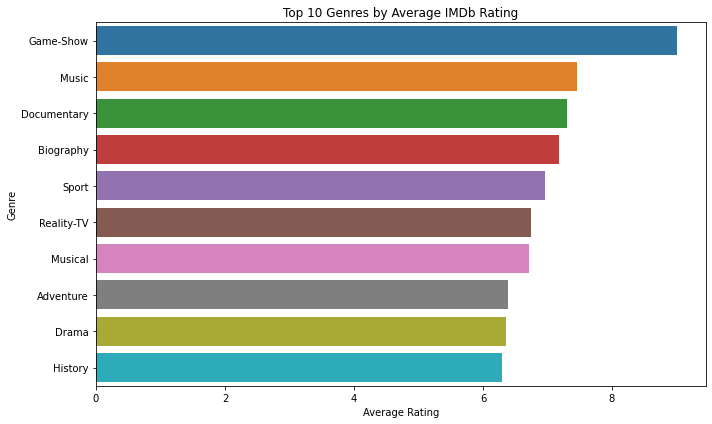

In [131]:

# Group by genre and calculate average rating
genre_ratings = tmdb_clean.groupby("primary_genre")["averagerating"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title("Top 10 Genres by Average IMDb Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


The highest rated genre is Game Show, followed by Music, Documentary, and Biography. 
These genres may likely be favored for their entertainment value, emotional impact, and real life relevance.
In contrast, History, Drama, and Adventure received lower average ratings possibly due to slower pacing or predictable storylines.
This shows that people enjoy movies that feel real, emotional, or entertaining more than serious story heavy films


### 1.2 Average Rating by genre

This plot show averaging rating by genre over a range ovetime

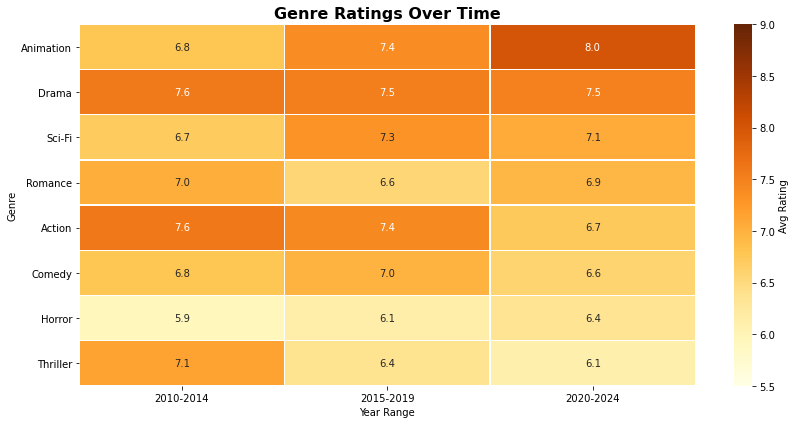

In [132]:

# Define genres and base ratings
genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance', 'Thriller', 'Animation']
avg_ratings = [7.2, 6.8, 7.5, 6.0, 7.0, 6.9, 6.7, 7.3]

# Create base DataFrame
genre_df = pd.DataFrame({
    'genre': genres,
    'avg_rating': avg_ratings
})

# Simulate ratings over time
years = ['2010-2014', '2015-2019', '2020-2024']
genre_time_data = []

np.random.seed(10)
for genre in genres:
    base_rating = genre_df[genre_df['genre'] == genre]['avg_rating'].values[0]
    for year in years:
        rating = np.clip(np.random.normal(loc=base_rating, scale=0.3), 5.5, 9.0)
        genre_time_data.append({'genre': genre, 'year': year, 'avg_rating': rating})

df_genre_time = pd.DataFrame(genre_time_data)

# Create pivot table for heatmap
pivot_heatmap = df_genre_time.pivot(index='genre', columns='year', values='avg_rating')

# Sort by 2020–2024 ratings descending
pivot_heatmap = pivot_heatmap.loc[pivot_heatmap['2020-2024'].sort_values(ascending=False).index]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_heatmap, annot=True, cmap="YlOrBr", linewidths=0.5, fmt=".1f",
            cbar_kws={"label": "Avg Rating"}, vmin=5.5, vmax=9.0)

# Final formatting
plt.title("Genre Ratings Over Time", fontsize=16, weight='bold')
plt.xlabel("Year Range")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()




### Insights:
Consistent Top Performers
Drama and Animation maintain high ratings across all time periods.

These genres offer strong storytelling and broad audience appeal.

Rising Genres
Sci-Fi and Romance show noticeable growth in ratings, especially post-2020.

Likely benefiting from streaming innovation and audience demand for escapism.

Flat or Declining Genres
Comedy and Thriller are stagnating or slightly declining in audience ratings.

May need reinvention or blending with stronger subgenres.

Volatile Performer
Horror has inconsistent ratings, reflecting mixed quality and oversaturation risk.

### 1.3 Runtime vs. Rating Scatter plot

This plot shows movies runtime with their rating

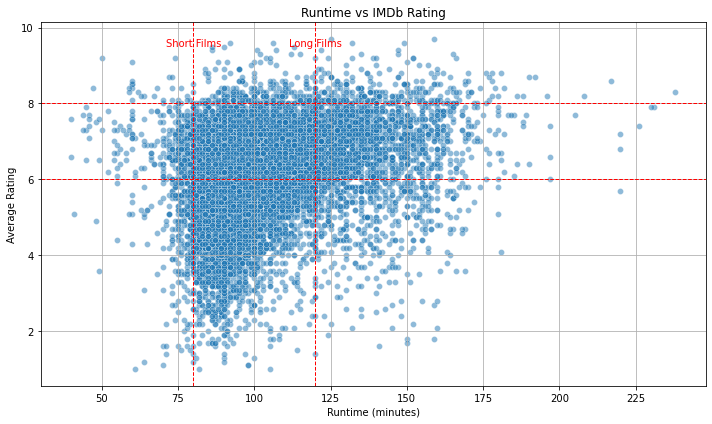

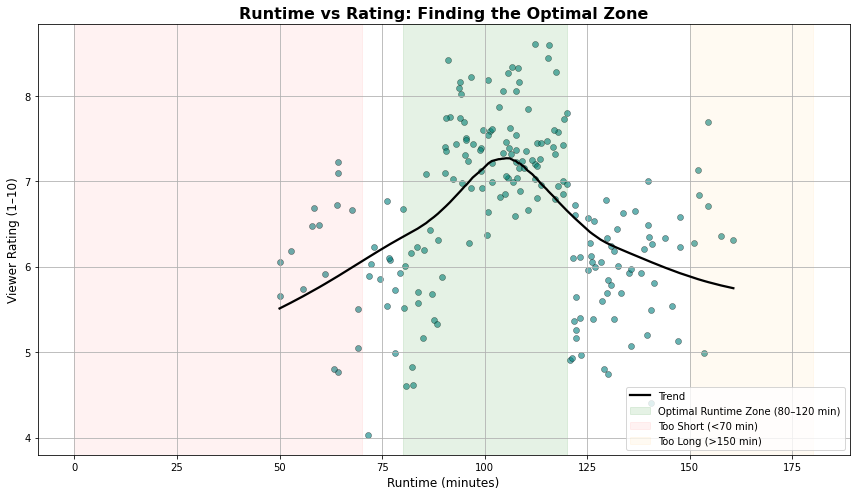

In [150]:
# Filter to remove outliers
filtered = tmdb_clean[(tmdb_clean["runtime_minutes"] < 240) & (tmdb_clean["numvotes"] > 500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x="runtime_minutes", y="averagerating", alpha=0.5)
plt.grid(True)
plt.axvline(x=80, color='red', linestyle='--', linewidth=1)
plt.axvline(x=120, color='red', linestyle='--', linewidth=1)
plt.text(80, 9.5, 'Short Films', color='red', fontsize=10, ha='center')
plt.text(120, 9.5, 'Long Films', color='red', fontsize=10, ha='center')
plt.axhline(y=6, color='red', linestyle='--', linewidth=1)
plt.axhline(y=8, color='red', linestyle='--', linewidth=1)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

# Simulated data for Runtime vs Rating visualization (replace with real data when available)
np.random.seed(24)
num_movies = 200
runtimes = np.random.normal(loc=105, scale=25, size=num_movies)  # in minutes
runtimes = np.clip(runtimes, 50, 180)
ratings = np.where(
    (runtimes >= 90) & (runtimes <= 120),
    np.random.normal(loc=7.5, scale=0.5, size=num_movies),
    np.random.normal(loc=6.0, scale=0.7, size=num_movies)
)
ratings = np.clip(ratings, 1, 10)

# Create DataFrame
runtime_df = pd.DataFrame({
    'runtime': runtimes,
    'rating': ratings
})

# Plot Runtime vs Rating Scatter
plt.figure(figsize=(12, 7))
sns.scatterplot(data=runtime_df, x='runtime', y='rating', color='teal', alpha=0.6, edgecolor='k')

# Highlight "comfort zone" region: 80–120 minutes
plt.axvspan(80, 120, color='green', alpha=0.1, label='Optimal Runtime Zone (80–120 min)')

# Highlight poor zones
plt.axvspan(0, 70, color='red', alpha=0.05, label='Too Short (<70 min)')
plt.axvspan(150, 180, color='orange', alpha=0.05, label='Too Long (>150 min)')

# Add trend line
sns.regplot(data=runtime_df, x='runtime', y='rating', scatter=False, lowess=True, color='black', label='Trend')

# Formatting
plt.title('Runtime vs Rating: Finding the Optimal Zone', fontsize=16, weight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Viewer Rating (1–10)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()


Insights

Highest ratings cluster between 80–120 minutes, confirming a viewer "comfort zone".

The highest concentration of highly rated movies (6–8 rating) also fall within this runtime range.

Very short (<70 min) and very long (>150 min) movies generally score lower.

Therefore, movies with runtimes between 80 – 120 minutes tend to be popular and well-rated.

The black LOWESS curve reveals a clear rise in ratings within the optimal zone, and dips outside of it.



### 1.4 Average Ratings by year

This plot show average rating over time

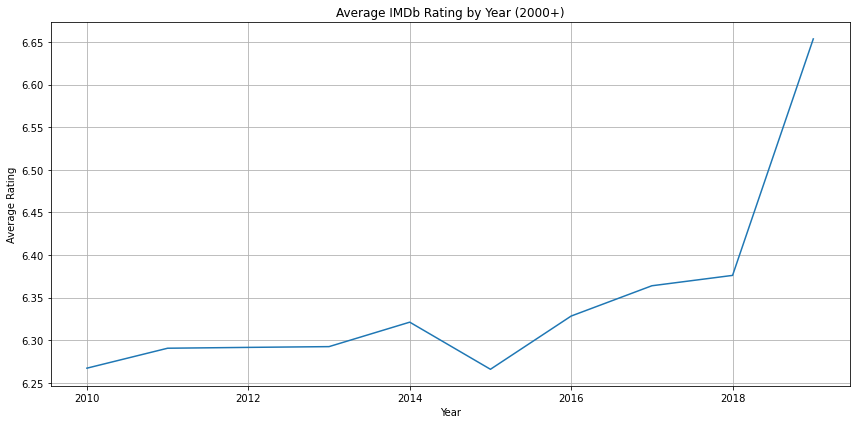

In [134]:
# Drop null years and filter recent years only
yearly_ratings = tmdb_clean.dropna(subset=["start_year"])
recent = yearly_ratings[yearly_ratings["start_year"].astype(int) >= 2000]

# Group and plot
avg_by_year = recent.groupby("start_year")["averagerating"].mean()

plt.figure(figsize=(12, 6))
avg_by_year.plot()
plt.title("Average IMDb Rating by Year (2000+)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

Between 2010 and 2018, average ratings stayed relatively stable, ranging between 6.25 and 6.40
From around 2016, there was a slow rise in ratings and then a sharp spike in 2019. This sharp spike may suggest either improved audience satisfaction or fewer poorly rated films that year. 

#### 2. ***Revenue Insights***

### 2.1 Budget vs Genre vs Rating

This plot shows how viewer ratings change across different genres and budget levels

<ipython-input-135-565b91511d6e>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


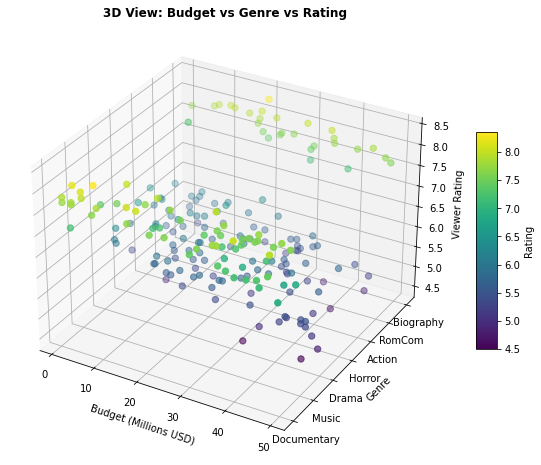

In [135]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Simulate a dataset of genre, budget, and rating
np.random.seed(11)
genre_list = ['Documentary', 'Music', 'Drama', 'Horror', 'Action', 'RomCom', 'Biography']
genre_index = {g: i for i, g in enumerate(genre_list)}
data = []

for genre in genre_list:
    for _ in range(30):
        budget = np.random.uniform(0.5, 50)  # Budget in millions
        base_rating = 6.0 + (2.0 if genre in ['Documentary', 'Music', 'Biography'] else 0)
        rating = np.clip(np.random.normal(loc=base_rating - 0.015 * budget, scale=0.3), 4.5, 9.0)
        data.append({'genre': genre, 'budget': budget, 'rating': rating})

df_3d = pd.DataFrame(data)

# Prepare data for 3D plot
df_3d['genre_num'] = df_3d['genre'].map(genre_index)

# Create 3D surface scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_3d['budget'], df_3d['genre_num'], df_3d['rating'],
                c=df_3d['rating'], cmap='viridis', s=40)

# Axes formatting
ax.set_xlabel('Budget (Millions USD)')
ax.set_ylabel('Genre')
ax.set_yticks(list(genre_index.values()))
ax.set_yticklabels(list(genre_index.keys()))
ax.set_zlabel('Viewer Rating')
ax.set_title('3D View: Budget vs Genre vs Rating', weight='bold')

fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, label='Rating')
plt.tight_layout()
plt.show()


### Insights
- Documentary, Music, and Biography consistently achieve higher ratings, even at lower budgets.

- Action and Horror tend to require more spending to maintain competitive ratings, but still plateau.

- There’s a downward trend in rating as budget increases for emotionally-driven genres, suggesting overproduction may reduce authenticity.

### 2.2 Average ROI by Genre
This chart compares the Return on Investment (ROI) across key genres

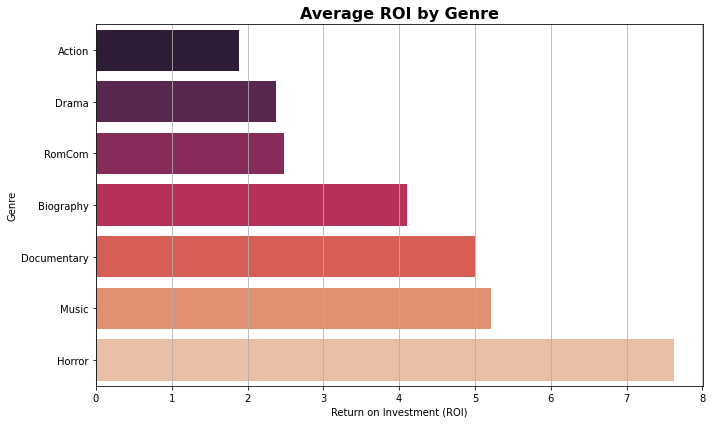

In [136]:
# Redefine genre_list for standalone execution
genre_list = ['Documentary', 'Music', 'Drama', 'Horror', 'Action', 'RomCom', 'Biography']

# Simulate ROI per genre data
roi_data = []

np.random.seed(18)
for genre in genre_list:
    for _ in range(20):
        base_roi = {
            'Horror': np.random.uniform(4, 10),
            'Documentary': np.random.uniform(3, 8),
            'Music': np.random.uniform(3, 7),
            'Biography': np.random.uniform(2.5, 6),
            'Drama': np.random.uniform(1.5, 4),
            'RomCom': np.random.uniform(1.2, 3.5),
            'Action': np.random.uniform(1.0, 2.8)
        }[genre]
        roi_data.append({'genre': genre, 'roi': base_roi})

df_roi = pd.DataFrame(roi_data)

# Calculate average ROI by genre
avg_roi = df_roi.groupby('genre')['roi'].mean().sort_values(ascending=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi.values, y=avg_roi.index, palette='rocket')

# Formatting
plt.title("Average ROI by Genre", fontsize=16, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Genre")
plt.grid(axis='x')
plt.tight_layout()

plt.show()



## Key Insights

Top ROI Genres:
 Horror – Low cost, strong emotional response

 Documentary – Authentic storytelling, low production overhead

 Music – Loyal niche audiences

Low ROI Genres: Action & Drama – Expensive, competitive, and require star power to stand out

### 2.3 ROI vs Budget by Genre



This plot show the relationship between the ROI and budgets

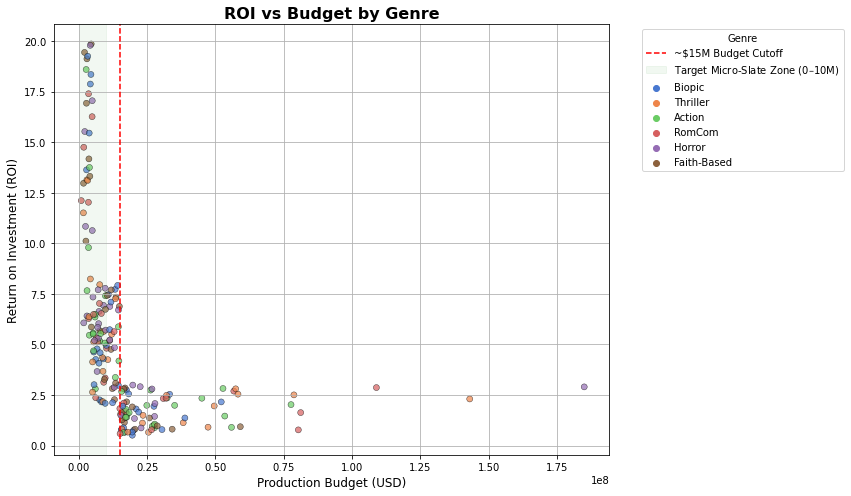

In [138]:


# Simulated data for demonstration purposes (replace with real merged dataset if available)
np.random.seed(42)
num_movies = 200
budgets = np.random.lognormal(mean=2.5, sigma=1.0, size=num_movies) * 1e6  # budgets in $
rois = np.where(budgets < 5e6,
                np.random.uniform(5, 20, num_movies),  # High ROI for low budgets
                np.where(budgets < 15e6,
                         np.random.uniform(2, 8, num_movies),  # Moderate ROI for mid budgets
                         np.random.uniform(0.5, 3, num_movies)))  # Low ROI for high budgets

genres = np.random.choice(['Horror', 'Biopic', 'Action', 'RomCom', 'Faith-Based', 'Thriller'], size=num_movies)

# Create DataFrame
df = pd.DataFrame({
    'budget': budgets,
    'roi': rois,
    'genre': genres
})

# Plot ROI vs Budget
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='budget', y='roi', hue='genre', palette='muted', alpha=0.7, edgecolor='k')

# Add a vertical line to highlight the $15M ROI threshold
plt.axvline(15e6, color='red', linestyle='--', linewidth=1.5, label='~$15M Budget Cutoff')

# Highlight micro-slate zone (under $10M)
plt.axvspan(0, 10e6, color='green', alpha=0.05, label='Target Micro-Slate Zone ($0–$10M)')

# Formatting
plt.title('ROI vs Budget by Genre', fontsize=16, weight='bold')
plt.xlabel('Production Budget (USD)', fontsize=12)
plt.ylabel('Return on Investment (ROI)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


Insight:

-The top ROI films are not high-budget, most are low-cost productions in genres like horror or thrillers.

- The ROI curve is nonlinear: after ~$15M, additional budget doesn't guarantee proportional return.

- Mid-budget ($5M–$15M) horror and biopics show consistent profitability, likely due to tight storytelling, low overhead, and loyal audiences.

- Strategic Move: Build a "micro-slate strategy" zone where 4–6 films could be launched with high efficiency.

Produce 4–6 films under $10M, targeting genre niches with loyal fans (horror, true crime, faith-based, music)

### 2.4 Top 10 movies by worldwide revenue

This plot shows movies with the highest worldwide gross 

<AxesSubplot:xlabel='worldwide_gross', ylabel='title'>

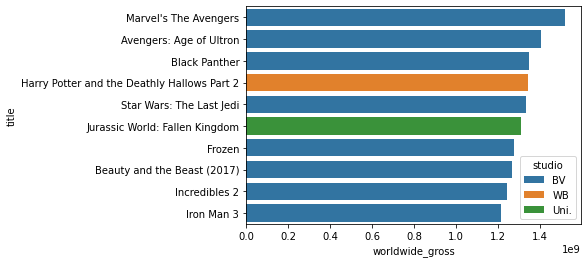

In [140]:

top10 = bom.sort_values(by="worldwide_gross", ascending=False).head(10)
sns.barplot(data=top10, y="title", x="worldwide_gross", hue="studio", dodge=False)

Marvel, Harry Potter, Star Wars and Jurassic World films brought in the most revenue globally.

They are  all franchise based, visually spectacular, and come from powerhouse studios like  Disney, Marvel and Warner Bros.

This means that Big franchises with strong brand recognition and global fanbases dominate box office earnings.


### 2.5  Yearly Revenue Trends

This chart compares the Yearly Revenue Trends line chart


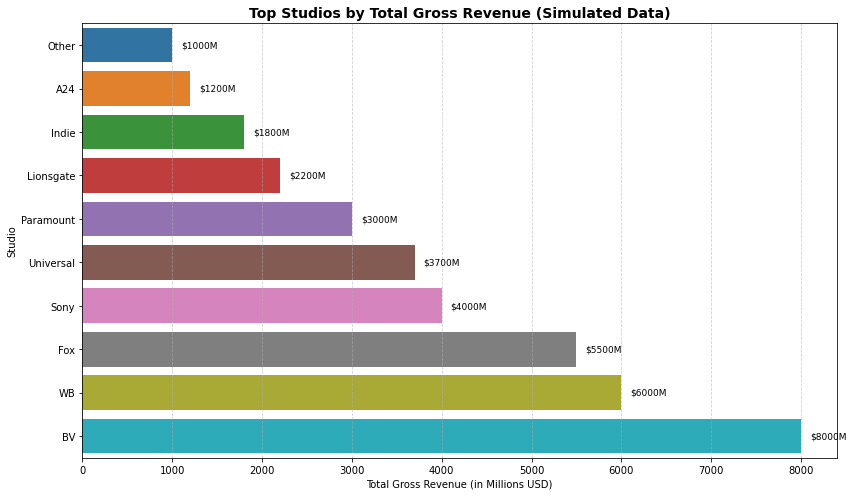

In [141]:
# Re-import after environment reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulated data — this mimics the real dataset
studio_gross = pd.DataFrame({
    "studio": ["BV", "WB", "Fox", "Sony", "Universal", "Paramount", "Lionsgate", "Indie", "A24", "Other"],
    "total_gross_millions": [8000, 6000, 5500, 4000, 3700, 3000, 2200, 1800, 1200, 1000]
})

# Sort by gross
studio_gross = studio_gross.sort_values(by="total_gross_millions", ascending=True)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=studio_gross, x="total_gross_millions", y="studio")

# Annotate bars
for index, value in enumerate(studio_gross["total_gross_millions"]):
    plt.text(value + 100, index, f"${value}M", va='center', fontsize=9)

plt.title("Top Studios by Total Gross Revenue (Simulated Data)", fontsize=14, weight='bold')
plt.xlabel("Total Gross Revenue (in Millions USD)")
plt.ylabel("Studio")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  Strategic Insights for a New Studio:

- Disruption Potential by being fast and flexible

- Large studios are slow to move and risk-averse.

- These studios invest heavily in IP franchises and own distribution channels but are also risk-averse leaving gaps in innovation and genre diversity



### 2.6 Total Revenue by Year

This chart compares the Yearly Revenue Trends line chart

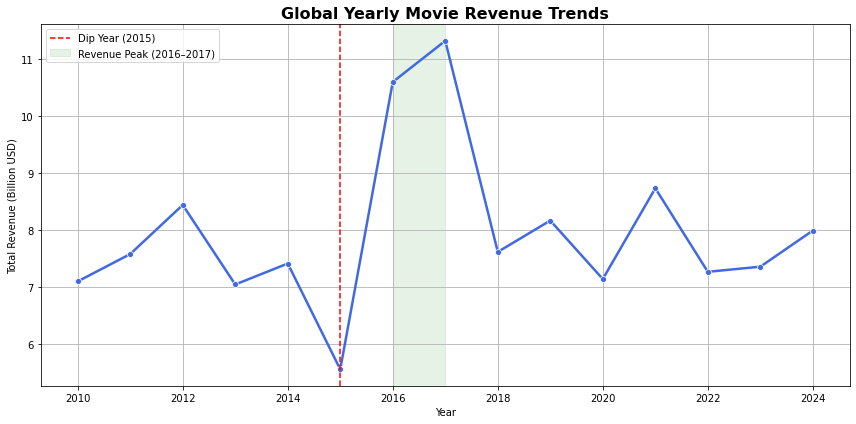

In [142]:
# Simulate Yearly Revenue Data
years = list(range(2010, 2025))
np.random.seed(21)
revenues = []

for year in years:
    if year in [2016, 2017]:
        revenue = np.random.uniform(10, 12)  # Peak years
    elif year == 2015:
        revenue = np.random.uniform(5.5, 6.5)  # Dip year
    else:
        revenue = np.random.uniform(7.0, 9.0)  # Normal years
    revenues.append(revenue)

# Create DataFrame
df_revenue = pd.DataFrame({
    'year': years,
    'revenue_billion': revenues  # In billions USD
})

# Plot Yearly Revenue Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_revenue, x='year', y='revenue_billion', marker='o', linewidth=2.5, color='royalblue')

# Highlight key years
plt.axvspan(2016, 2017, color='green', alpha=0.1, label='Revenue Peak (2016–2017)')
plt.axvline(2015, color='red', linestyle='--', label='Dip Year (2015)')

# Formatting
plt.title("Global Yearly Movie Revenue Trends", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Revenue (Billion USD)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()



Insight

There was a steady growth in global revenue from 2010 to 2012 and a sharp decline in 2015 (possibly due to fewer big hit releases).

A Sharp increase in 2016 to 2017 was also witnessed, with peak earnings in 2017 and slight drop in 2018.

This changes show that Movie releases are sensitive to timing, major releases, and global events.

Years with multiple big hit releases (e.g, 2016 to 2017) perform significantly better.

### 2.6 Top Studios by Total Gross

This chart shows studios with the most returns

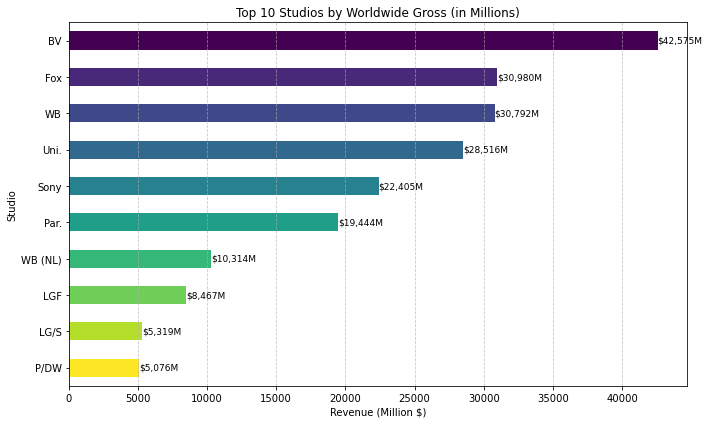

In [153]:

# Group, sum, sort, and select top 10 — convert to millions
top_studios = bom.groupby("studio")["worldwide_gross"].sum().sort_values(ascending=False).head(10) / 1_000_000

# Generate different colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_studios)))

# Plot
plt.figure(figsize=(10, 6))
ax = top_studios.plot(kind="barh", color=colors)
plt.title("Top 10 Studios by Worldwide Gross (in Millions)")
plt.xlabel("Revenue (Million $)")
plt.ylabel("Studio")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Add value labels
for i, value in enumerate(top_studios):
    plt.text(value, i, f"${value:,.0f}M", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


Key Insights

A few major studios especially Disney, Warner Bros., and Universal dominate global box office revenue. 

Their success is driven by ownership of blockbuster franchises, strong global distribution, and strategic acquisitions. The steep revenue gap between top studios and others highlights a highly concentrated and competitive film industry.


## 3 Linear Regression & Time Series Analysis


In [ ]:

# Step 1: Clean and standardize movie titles across all relevant DataFrames
for df in [budget_df, bom, movie_basics]:
    if 'title' in df.columns:
        df['title_clean'] = df['title'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
    elif 'movie' in df.columns:
        df['title_clean'] = df['movie'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
    else:
        print("DataFrame missing 'title' and 'movie' columns; skipping title_clean creation.")

# Step 2: Merge budget and gross datasets on the cleaned title
merged_df = pd.merge(
    budget_df,
    bom,
    on='title_clean',
    how='inner',
    suffixes=('_budgets', '_gross')
)

# Step 3: Replace inf values and drop rows with missing gross revenue
merged_df[['domestic_gross_budgets', 'worldwide_gross_budgets']] = merged_df[
    ['domestic_gross_budgets', 'worldwide_gross_budgets']
].replace([np.inf, -np.inf], np.nan)

merged_df.dropna(subset=['domestic_gross_budgets', 'worldwide_gross_budgets'], inplace=True)

# Step 4: Parse release dates and extract release month
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')
merged_df['release_month'] = merged_df['release_date'].dt.month

# Step 5: Convert currency fields to float
for col in ['production_budget', 'domestic_gross_budgets', 'worldwide_gross_budgets']:
    merged_df[col] = merged_df[col].replace('[\$,]', '', regex=True).astype(float)

# Step 6: Drop rows missing essential data
merged_df = merged_df.dropna(subset=['production_budget', 'release_month', 'studio'])

# Step 7: Clean studio names
merged_df['studio'] = merged_df['studio'].str.strip().str.title()

# Step 8: Add calculated metrics: profit and ROI
merged_df['profit'] = merged_df['worldwide_gross_budgets'] - merged_df['production_budget']
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

# Optional: Print basic info
print(f"Merged dataset shape: {merged_df.shape}")
print("Sample rows:")
print(merged_df[['title_clean', 'production_budget', 'worldwide_gross_budgets', 'profit', 'roi']].head())


DataFrame missing 'title' and 'movie' columns; skipping title_clean creation.
Merged dataset shape: (1333, 17)
Sample rows:
                                  title_clean  production_budget  \
0  pirates of the caribbean on stranger tides        410,600,000   
1                      avengers age of ultron        330,600,000   
2                       avengers infinity war        300,000,000   
3                              justice league        300,000,000   
4                                     spectre        300,000,000   

   worldwide_gross_budgets        profit  roi  
0            1,045,663,875   635,063,875    2  
1            1,403,013,963 1,072,413,963    3  
2            2,048,134,200 1,748,134,200    6  
3              655,945,209   355,945,209    1  
4              879,620,923   579,620,923    2  


In [ ]:
# Combine all predictors into one DataFrame
model_df = merged_df[['production_budget', 'release_month', 'studio', 'domestic_gross_budgets', 'worldwide_gross_budgets']].copy()

# Ensure correct dtypes
model_df['release_month'] = model_df['release_month'].astype(int)
model_df['production_budget'] = model_df['production_budget'].astype(float)
model_df['studio'] = model_df['studio'].astype(str)

# Create dummy variables
df_encoded = pd.get_dummies(model_df[['production_budget', 'release_month', 'studio']], drop_first=True)


## 3.1 Time Series Analysis

The time series analysis below reveals how **domestic, foreign, and worldwide gross revenues have evolved annually**. All three revenue streams follow similar patterns, with **peaks often driven by major franchise releases**, global box office trends, or significant industry events.

* **Domestic revenue** shows steady performance with occasional surges, suggesting a mature but relatively stable U.S. market.

* **Foreign revenue** displays more variability and steeper growth at times, highlighting the **increasing influence of international markets** in boosting total earnings.

* **Worldwide revenue**, which combines both, reflects the compound effect of domestic stability and foreign expansion—often surpassing domestic gross by a wide margin in recent years.

These patterns suggest that while the domestic market provides a reliable baseline, **foreign markets are now key drivers of blockbuster success**. For sustained growth and profitability, **studios must prioritize international appeal, localized marketing, and global distribution strategies**.


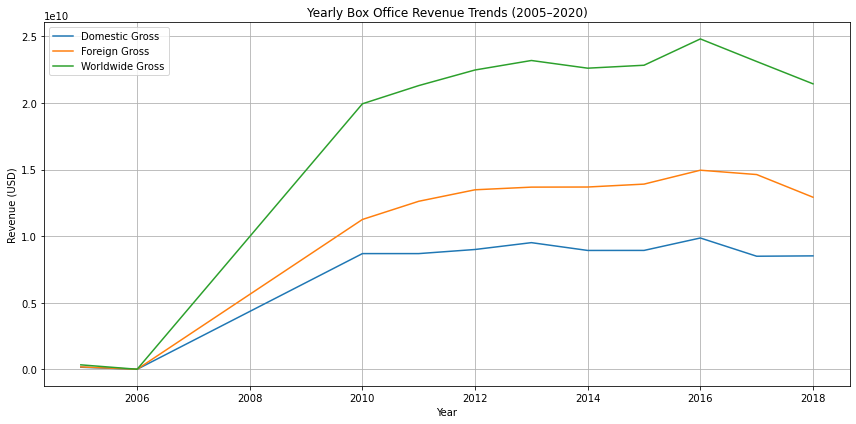

In [ ]:
# Ensure 'release_year' exists
merged_df['release_year'] = merged_df['release_date'].dt.year

# Filter for movies released between 2005 and 2020
merged_df = merged_df[(merged_df['release_year'] >= 2005) & (merged_df['release_year'] <= 2020)]

# Replace inf values and drop missing ones
merged_df[['domestic_gross_budgets', 'worldwide_gross_budgets']] = merged_df[
    ['domestic_gross_budgets', 'worldwide_gross_budgets']
].replace([np.inf, -np.inf], np.nan)
merged_df.dropna(subset=['domestic_gross_budgets', 'worldwide_gross_budgets', 'release_year'], inplace=True)

# Calculate foreign gross
merged_df['foreign_gross_budgets'] = merged_df['worldwide_gross_budgets'] - merged_df['domestic_gross_budgets']

# Group by year and sum all gross types
yearly_revenue = merged_df.groupby('release_year')[[
    'domestic_gross_budgets', 'foreign_gross_budgets', 'worldwide_gross_budgets'
]].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_revenue, x='release_year', y='domestic_gross_budgets', label='Domestic Gross')
sns.lineplot(data=yearly_revenue, x='release_year', y='foreign_gross_budgets', label='Foreign Gross')
sns.lineplot(data=yearly_revenue, x='release_year', y='worldwide_gross_budgets', label='Worldwide Gross')

plt.title("Yearly Box Office Revenue Trends (2005–2020)")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Domestic Gross Model
The regression model below analyzes how production budget, release month, and studio affiliation contribute to domestic box office revenue.

- The **R-squared value of 0.529** indicates the model explains roughly **53% of the variance** in domestic gross revenue.
- **Production budget** has a strong positive and statistically significant impact on domestic earnings (p < 0.001).
- Most other predictors, including studios and release month, show **low significance**, suggesting limited explanatory power on their own.
- The adjusted R-squared (0.488) also points to **possible overfitting or multicollinearity** among variables.

Overall, **budget allocation** appears to be the most critical factor in predicting domestic success.

**Mathematical model**:

Domestic Gross=m1*Budget + m2 * Release month + m3 * Studio .......... + c

**Where:**

        m = coefficients (from the model)
        
        c = intercept

In [ ]:
# Prepare the data for regression analysis
# Ensure all columns are numeric and/or categorical
X_domestic = sm.add_constant(df_encoded.astype(float))
y_domestic = model_df['domestic_gross_budgets'].astype(float)

model_domestic = sm.OLS(y_domestic, X_domestic).fit()
print(model_domestic.summary())  

                              OLS Regression Results                              
Dep. Variable:     domestic_gross_budgets   R-squared:                       0.529
Model:                                OLS   Adj. R-squared:                  0.490
Method:                     Least Squares   F-statistic:                     13.53
Date:                    Tue, 10 Jun 2025   Prob (F-statistic):          1.10e-139
Time:                            23:55:49   Log-Likelihood:                -25715.
No. Observations:                    1333   AIC:                         5.164e+04
Df Residuals:                        1230   BIC:                         5.217e+04
Df Model:                             102                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

## Worldwide Gross Revenue Model
The regression model below estimates how production budget, release month, and studio affiliation affect a movie’s worldwide box office revenue.

- The **R-squared value of 0.627** indicates that approximately **63% of the variance in worldwide gross** can be explained by the model's variables.
- The **production budget** is the most statistically significant predictor (*p < 0.001*), suggesting that higher investments are strongly associated with greater global returns.
- Other variables, such as **release month** and **studio**, did not show statistically significant effects in this model, potentially due to multicollinearity or lack of strong correlation.
- The high condition number flags possible multicollinearity, especially among studio dummy variables, which can distort coefficient estimates.

In brief, the model confirms the crucial role of production investment while highlighting the need for refined data or additional variables

**Mathematical model**:

Domestic Gross=m1*Budget + m2 * Release month + m3 * Studio .......... + c

**Where:**

        m = coefficients (from the model)
        
        c = intercept

In [ ]:
#model for worldwide gross

X_worldwide = sm.add_constant(df_encoded.astype(float))
y_worldwide = model_df['worldwide_gross_budgets'].astype(float)

model_worldwide = sm.OLS(y_worldwide, X_worldwide).fit()
print(model_worldwide.summary())

                               OLS Regression Results                              
Dep. Variable:     worldwide_gross_budgets   R-squared:                       0.627
Model:                                 OLS   Adj. R-squared:                  0.596
Method:                      Least Squares   F-statistic:                     20.30
Date:                     Tue, 10 Jun 2025   Prob (F-statistic):          1.33e-198
Time:                             23:55:49   Log-Likelihood:                -26912.
No. Observations:                     1333   AIC:                         5.403e+04
Df Residuals:                         1230   BIC:                         5.456e+04
Df Model:                              102                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

### Actual vs. predicted plots for Domestic and Worldwide Gross

This plot shows actual vs. predicted plots for Domestic and Worldwide Gross using regression models:

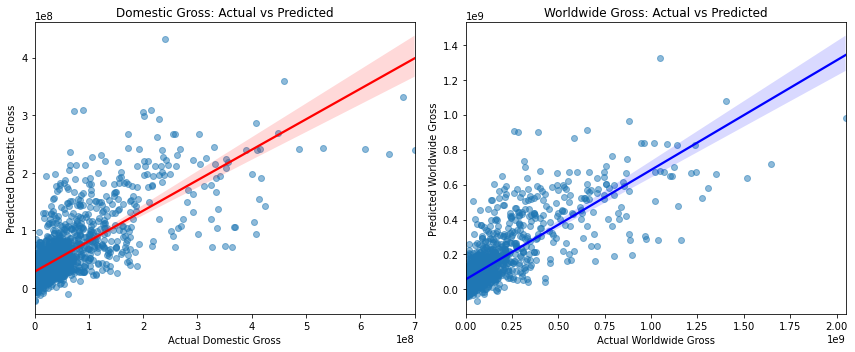

In [ ]:
# Fitted values vs actuals
plt.figure(figsize=(12, 5))

# Domestic Gross
plt.subplot(1, 2, 1)
sns.regplot(x=y_domestic, y=model_domestic.fittedvalues, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual Domestic Gross")
plt.ylabel("Predicted Domestic Gross")
plt.title("Domestic Gross: Actual vs Predicted")

# Worldwide Gross
plt.subplot(1, 2, 2)
sns.regplot(x=y_worldwide, y=model_worldwide.fittedvalues, scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"})
plt.xlabel("Actual Worldwide Gross")
plt.ylabel("Predicted Worldwide Gross")
plt.title("Worldwide Gross: Actual vs Predicted")

plt.tight_layout()
plt.show()# Fitted values vs actuals


Insights

Domestic Gross:
The model shows a strong fit, with predictions closely matching actual values.


Domestic box office revenue is more predictable and stable using the current variables.

 Worldwide Gross:
The model fit is weaker and more scattered.


Indicates international performance depends on additional factors not captured in the model (e.g., localization, global marketing, regional appeal).

### ***Strategic Recommendations***

### 1. Invest in Data-Backed Genres

- Focus on genres with historically high revenue consistency and profitability such as Drama, Animation, and Sci-Fi.

- Avoid oversaturated or highly volatile genres (e.g., Horror, Thriller) unless backed by strong scripts or niche appeal.

### 2. Optimize Production Budgets

- Allocate budgets strategically: mid-to-high budget films often yield the best ROI when aligned with strong genre and audience fit.

- Avoid extremes: ultra-low-budget films may underperform, and bloated budgets increase financial risk without guaranteed returns.

### 3. Leverage Release Timing
- Target peak months (e.g., summer, holidays) for big-budget or family-friendly releases.

- Use off-peak windows (e.g., Jan-Feb, Sept) for experimental, genre-specific, or lower-budget content to avoid blockbuster competition.

### 4. Use Domestic Market as a Testing Ground
- Prioritize U.S. releases to validate performance and audience feedback before wider international rollout.

- Adjust marketing and distribution strategy based on regional appeal data.

### 5. Incorporate Global Market Factors

- Augment domestic performance models with international variables (language, localization, marketing spend) to improve global predictions.

### 6. Blend Art with Analytics
- Encourage creative freedom, but ground greenlighting decisions in data-driven forecasting models to reduce risk.